In [12]:
import fastai
from fastbook import *

In [37]:

#id first_training
#caption Results from the first training
# CLICK ME

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

f:\Dev\python\python3.10\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\Dev\python\python3.10\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.172249,0.028945,0.008796,09:29


epoch,train_loss,valid_loss,error_rate,time
0,0.063385,0.024624,0.008119,14:37


2.7.10


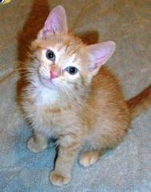

In [33]:
print(fastai.__version__)
#from fastai.vision.all import *
#import fastcore
img = PILImage.create(image_cat())
img.to_thumb(192)

In [8]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

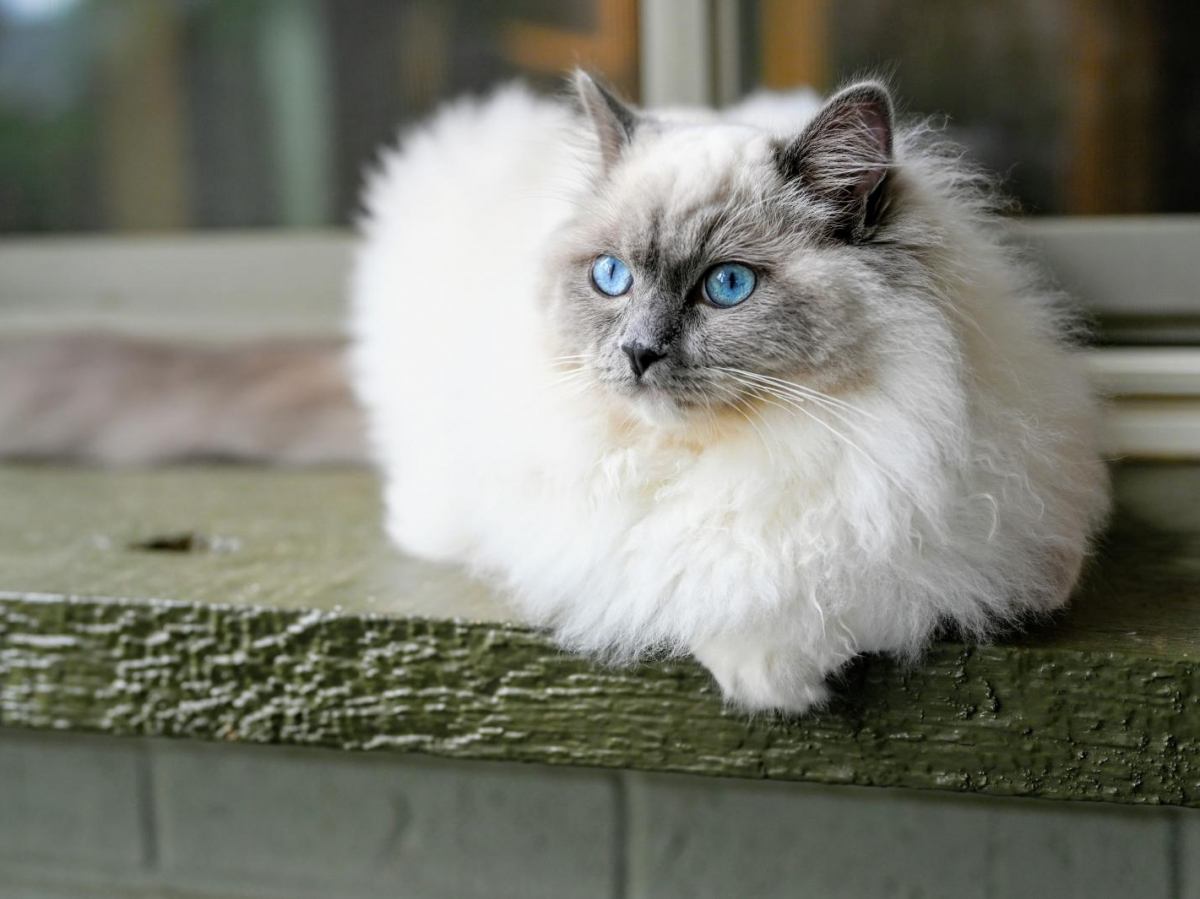

In [34]:
uploader = SimpleNamespace(data = ['chat.jpg'])
uploader.data[0]
img = PILImage.create('chat.jpg')
img

In [38]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [4]:

from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [5]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.378201,0.373804,0.831388,00:04
1,0.357113,0.354285,0.835842,00:04
2,0.351375,0.351169,0.839066,00:03


In [6]:

from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497563,1.419108,00:01


epoch,train_loss,valid_loss,time
0,1.348369,1.360463,00:00
1,1.248621,1.178440,00:00
2,1.010771,0.876555,00:00
3,0.791824,0.746206,00:00
4,0.690008,0.717330,00:00
5,0.641033,0.709639,00:00
6,0.629534,0.706519,00:00
7,0.610997,0.704522,00:00
8,0.603987,0.703974,00:00
9,0.603293,0.703902,00:00


In [7]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,44.0,72.0,5.0,3.459052
1,13.0,51.0,4.0,4.119844
2,62.0,65.0,4.0,3.665025
3,40.0,53.0,5.0,3.804961
4,19.0,16.0,4.5,4.498744
5,15.0,5.0,4.5,3.444189
6,83.0,10.0,2.0,2.451943
7,55.0,14.0,5.0,4.391811
8,63.0,26.0,3.0,2.967124
